# Grafica SMA

Primero cargo librerias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import cufflinks as cf
cf.go_offline()

Cargo datos, si quisiera poner fecha especifica: ("ETH-USD", start = "año, mes, dia", end = "año, mes, dia")

In [2]:
df = yf.download("ETH-USD")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


Primero cago la media, despues la agrego y luego recorto los datos NaN

In [3]:
sma = 200

df["SMA"] = df.Close.rolling(sma).mean()
df = df.dropna()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
2021-05-21,2772.341309,2938.205078,2113.347168,2430.621338,2430.621338,53774070802,1564.450047
2021-05-22,2436.014648,2483.983154,2168.124268,2295.705566,2295.705566,42089937660,1573.990564
2021-05-23,2298.367188,2384.411621,1737.468750,2109.579834,2109.579834,56005721977,1582.527753
2021-05-24,2099.936035,2672.595703,2090.639648,2643.591064,2643.591064,53697121740,1593.675372
2021-05-25,2660.402832,2746.968262,2399.100830,2653.957520,2653.957520,48966873088,1604.671563


Grafico usando matplotlib

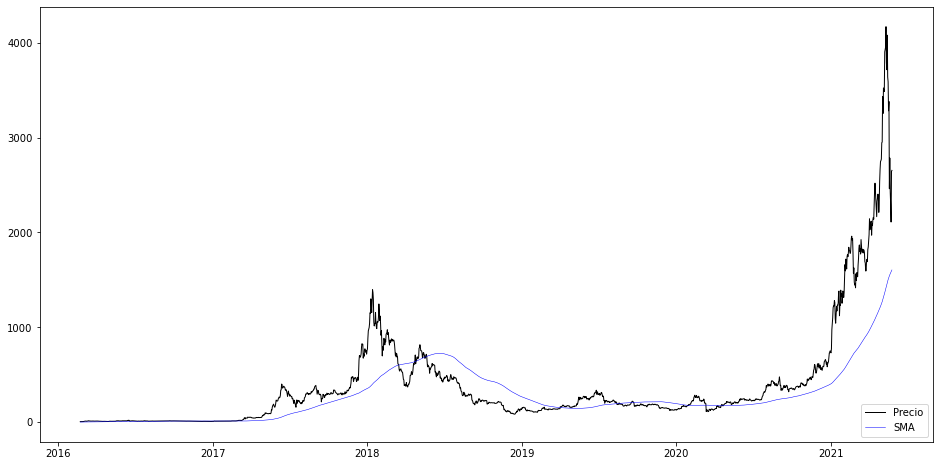

In [4]:
plt.figure(figsize = (16, 8))
plt.plot(df.Close, c = "k", lw = 1)
plt.plot(df.SMA, c = "blue", lw = 0.5)
plt.legend(["Precio", "SMA"], loc = "lower right")

Grafico interactivo con Cufflinks

In [5]:
qf = cf.QuantFig(df, title = "ETH: SMA", legend = "top")
qf.add_sma([sma], width = 2, color = ["blue"], legendgroup = True)
qf.iplot(up_color = "black")